In [0]:
from keras.datasets import cifar10

import numpy as np
import keras

from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

random_state = 42

In [0]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(
    cifar_X, cifar_y, test_size=10000, random_state=random_state)
train_X, valid_X, train_y, valid_y = train_test_split(
    train_X, train_y, test_size=10000, random_state=random_state)

In [16]:
cifar_X_1.shape

(50000, 32, 32, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import EarlyStopping

In [0]:
model = Sequential()

In [0]:
model = Sequential()

# 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x64 -> 14x14x64
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # 12x12x128 -> 5x5x128
model.add(Dropout(0.5))

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
# 120 ->84
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  
model.add(Dense(10, activation='softmax'))  # 84 ->10

In [0]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [65]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_y, batch_size=128, epochs=10, verbose=1,
          validation_data=(test_X, test_y), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 364us/step - loss: 1.7498 - acc: 0.3504 - val_loss: 1.4037 - val_acc: 0.4940
Epoch 2/10
40000/40000 [==============================] - 14s 339us/step - loss: 1.3428 - acc: 0.5146 - val_loss: 1.1756 - val_acc: 0.5809
Epoch 3/10
19328/40000 [=============>................] - ETA: 6s - loss: 1.2002 - acc: 0.5737

40000/40000 [==============================] - 14s 339us/step - loss: 1.1705 - acc: 0.5836 - val_loss: 1.0622 - val_acc: 0.6188
Epoch 4/10
40000/40000 [==============================] - 14s 340us/step - loss: 1.0448 - acc: 0.6280 - val_loss: 0.9456 - val_acc: 0.6721
Epoch 5/10
40000/40000 [==============================] - 14s 340us/step - loss: 0.9554 - acc: 0.6631 - val_loss: 0.8723 - val_acc: 0.6968
Epoch 6/10
  384/40000 [..............................] - ETA: 13s - loss: 0.8641 - acc: 0.7031

40000/40000 [==============================] - 14s 343us/step - loss: 0.8853 - acc: 0.6921 - val_loss: 0.8398 - val_acc: 0.7043
Epoch 7/10
40000/40000 [==============================] - 14s 344us/step - loss: 0.8254 - acc: 0.7109 - val_loss: 0.7572 - val_acc: 0.7390
Epoch 8/10
36736/40000 [==========================>...] - ETA: 1s - loss: 0.7798 - acc: 0.7268

40000/40000 [==============================] - 14s 345us/step - loss: 0.7778 - acc: 0.7271 - val_loss: 0.7572 - val_acc: 0.7380
Epoch 9/10
40000/40000 [==============================] - 14s 343us/step - loss: 0.7459 - acc: 0.7355 - val_loss: 0.7182 - val_acc: 0.7481
Epoch 10/10
40000/40000 [==============================] - 14s 344us/step - loss: 0.7072 - acc: 0.7503 - val_loss: 0.6862 - val_acc: 0.7647


In [66]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6862309465408325
Test accuracy: 0.7647


In [0]:
model.save_weights('cifar10-cnn-weights.h5')

In [68]:
from google.colab import files
uploaded = files.upload()

Saving test-car.jpg to test-car (2).jpg


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
labels = ["airplane", "automobile", "bird", "cat", "deer"
          , "dog", "forg", "horse", "ship", "truck"]

# モデルデータの読み込み
model.load_weights('cifar10-cnn-weights.h5')

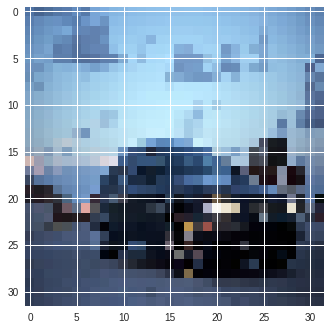

1/1 [==============================] - 0s 200ms/step
airplane = 0
automobile = 100
bird = 0
cat = 0
deer = 0
dog = 0
forg = 0
horse = 0
ship = 0
truck = 0
---
予測した結果= automobile


In [71]:
# OpenCVを使って画像を読み込む
im = cv2.imread('test-car.jpg')

# 色空間を変換してリサイズ
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im)
plt.show()

# 予測する
r = model.predict(np.array([im]), batch_size=32, verbose=1)
res = r[0]

# 結果を表示する
for i, acc in enumerate(res):
  print(labels[i], "=", int(acc * 100))
print("---")  
print("予測した結果=", labels[res.argmax()])